In [1]:
import pandas as pd
import numpy as np

In [2]:
parking_data = pd.read_csv('Parking_Violations_Issued_-_Fiscal_Year_2023_20231210.csv' , index_col=0 )
parking_data = parking_data.reset_index()
parking_data.columns

C:\Users\14367\AppData\Local\Temp\ipykernel_19764\3956723268.py:1: DtypeWarning: Columns (17,18,20,22,23,26,27,29,30,31,32,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  parking_data = pd.read_csv('Parking_Violations_Issued_-_Fiscal_Year_2023_20231210.csv' , index_col=0 )


Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation'],
      dtype='object')

In [3]:
parking_data['Issue Date'] = pd.to_datetime(parking_data['Issue Date'])
parking_data['Month'] = parking_data['Issue Date'].dt.month
parking_data['Year'] = parking_data['Issue Date'].dt.year
parking_data['DOY'] = parking_data['Issue Date'].dt.dayofyear
parking_data['DOW'] = parking_data['Issue Date'].dt.dayofweek
parking_data.head()


,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,Month,Year,DOY,DOW
0,1484697303,JER1863,NY,PAS,2022-06-10,67,SDN,TOYOT,P,34330,...,0,NaN,NaN,NaN,NaN,NaN,6,2022,161,4
1,1484697315,KEV4487,NY,PAS,2022-06-13,51,SUBN,JEEP,K,34310,...,0,NaN,NaN,NaN,NaN,NaN,6,2022,164,0
2,1484697625,H73NYD,NJ,PAS,2022-06-19,63,SDN,JEEP,N,30640,...,0,NaN,NaN,NaN,NaN,NaN,6,2022,170,6
3,1484697674,GJC9296,NY,PAS,2022-06-19,63,SUBN,LEXUS,N,30640,...,0,NaN,NaN,NaN,NaN,NaN,6,2022,170,6
4,1484697686,M51PUV,NJ,PAS,2022-06-19,63,SDN,HYUND,N,30640,...,0,NaN,NaN,NaN,NaN,NaN,6,2022,170,6


In [4]:
#Qingyang Zhao's task
parking_data.columns

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation', 'Month', 'Year', 'DOY', 'DOW'],
  

In [5]:
parking_data.dropna(axis=0,subset=['Violation Location'],inplace=True)

In [6]:
parking_data.dropna(axis=0,subset=['Street Name'],inplace=True)

In [7]:
parking_data.dropna(axis=0,subset=['Violation County'],inplace=True)

In [8]:
databyVL = parking_data.groupby(by='Violation Location', as_index=False).count()[['Violation Location','Summons Number']]

In [9]:
databyVL.rename(columns={'Summons Number':'N'}, inplace=True)
databyVL.head()

,Violation Location,N
0,1.0,287060
1,2.0,29
2,3.0,49
3,4.0,51
4,5.0,131823


In [10]:
databyVL1=databyVL.sort_values(by=['N'], ascending=False)

In [11]:
databyVL1.head(10)

,Violation Location,N
18,19.0,544048
12,13.0,444802
5,6.0,422627
113,114.0,415825
13,14.0,367533
17,18.0,319407
8,9.0,296476
0,1.0,287060
108,109.0,270571
114,115.0,247636


In [12]:
databyVL1.tail(10)

,Violation Location,N
152,201.0,1
154,211.0,1
155,220.0,1
156,221.0,1
157,225.0,1
158,247.0,1
159,270.0,1
130,140.0,1
161,401.0,1
190,971.0,1


In [13]:
parking_data['Violation County'].unique()

array(['NY', 'BX', 'Q', 'R', 'K', 'MS', 'Kings', 'Qns', 'Bronx', 'Rich',
       'QNS', 'ABX', 'QUEEN', 'K   F', 'KINGS', 'RICH', 'BRONX'],
      dtype=object)

In [14]:
parking_data=parking_data.replace({'Violation County':{'Q':'QNS', 'R':'RM', 'K':'BK', 'MS':'NY', 'Kings':'BK',
             'Qns':'QNS', 'Bronx':'BX', 'Rich':'RM', 'ABX':'BX', 'QUEEN':'QNS', 'K   F':'BK', 'KINGS':'BK', 'RICH':'RM', 'BRONX':'BX'}})

In [15]:
parking_data['Violation County'].unique()

array(['NY', 'BX', 'QNS', 'RM', 'BK'], dtype=object)

In [16]:
databyVC = parking_data.groupby(by='Violation County', as_index=False).count()[['Violation County','Summons Number']]

In [17]:
databyVC.rename(columns={'Summons Number':'N'}, inplace=True)
databyVC.head()

,Violation County,N
0,BK,2968097
1,BX,1498101
2,NY,4551812
3,QNS,2477558
4,RM,184717


In [18]:
databyVC1=databyVC.sort_values(by=['N'], ascending=False)

In [19]:
databyVC1.head(3)

,Violation County,N
2,NY,4551812
0,BK,2968097
3,QNS,2477558


In [20]:
databySN = parking_data.groupby(by='Street Name', as_index=False).count()[['Street Name','Summons Number']]

In [21]:
databySN.rename(columns={'Summons Number':'N'}, inplace=True)
databySN.head()

,Street Name,N
0,01 ROAD,1
1,0137 ST,1
2,08 AVE,1
3,1 AVE,138
4,1 AVENUE,1193


In [22]:
databySN1=databySN.sort_values(by=['N'], ascending=False)

In [23]:
databySN1.head(10)

,Street Name,N
7864,Broadway,225776
2360,3rd Ave,165573
2854,5th Ave,117880
2117,2nd Ave,99651
28084,Madison Ave,96740
26726,Lexington Ave,91143
1452,1st Ave,81852
3168,6th Ave,79027
36381,Queens Blvd,69123
3691,8th Ave,63985


In [24]:
databySN1.tail(10)

,Street Name,N
26753,Linden Blvd and powe,1
26750,Linden,1
26743,Lincoln Ct,1
26739,Lillian Pl,1
26725,Lexa Pl,1
26721,Lewis st btwn delanc,1
26707,Leonard Street Lot,1
26702,Lenox terrace and we,1
26687,Left side of Rider A,1
54038,west 135st and Lenox,1


In [25]:
import geopandas as gpd
boro = gpd.read_file('https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=Shapefile')

In [26]:
boro.head()

,boro_code,boro_name,shape_area,shape_leng,geometry
0,5.0,Staten Island,1.623621e+09,325917.353950,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,2.0,Bronx,1.187175e+09,463179.772813,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
2,4.0,Queens,3.041419e+09,888199.730955,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."
3,1.0,Manhattan,6.365205e+08,357713.308660,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,3.0,Brooklyn,1.934138e+09,728148.532410,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."


In [27]:
boro=boro.replace({'boro_name':{'Staten Island':'RM','Bronx':'BX','Queens':'QNS','Manhattan':'NY','Brooklyn':'BK'}})

In [28]:
boro.to_crs(epsg=4326, inplace=True)

In [29]:
data = boro.merge(databyVC,left_on='boro_name',right_on='Violation County')

In [30]:
data.to_crs(epsg=4326, inplace=True)

In [31]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

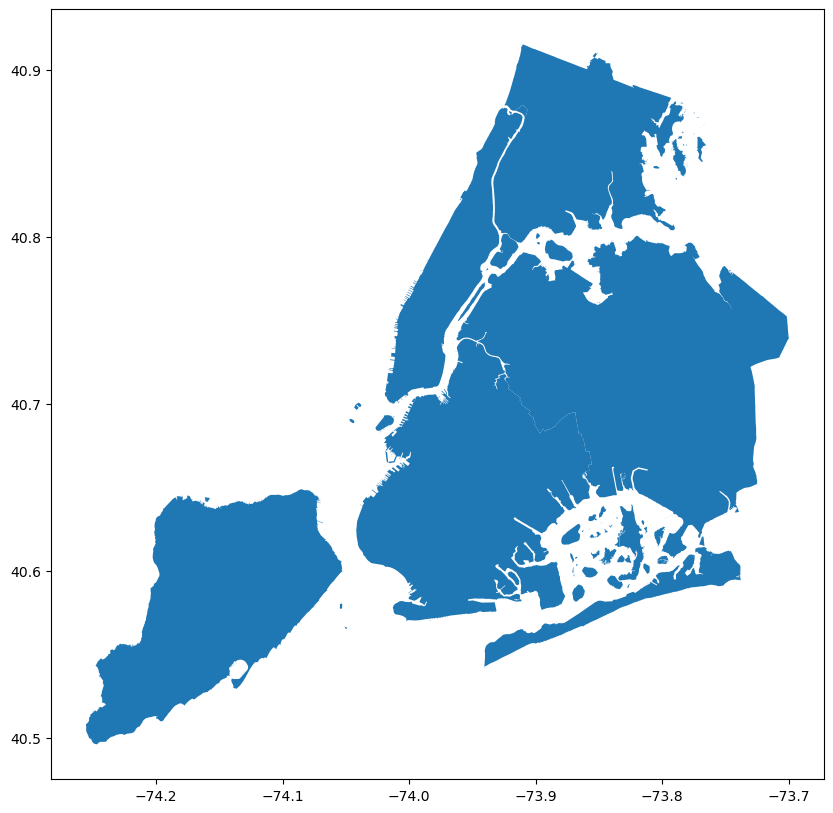

In [32]:
boro.plot(figsize=(10,10))

C:\Users\14367\AppData\Local\Temp\ipykernel_19764\773651343.py:1: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  data.plot(figsize=(10,10),column='N',colormap = 'Purples', legend=True)


<Axes: >

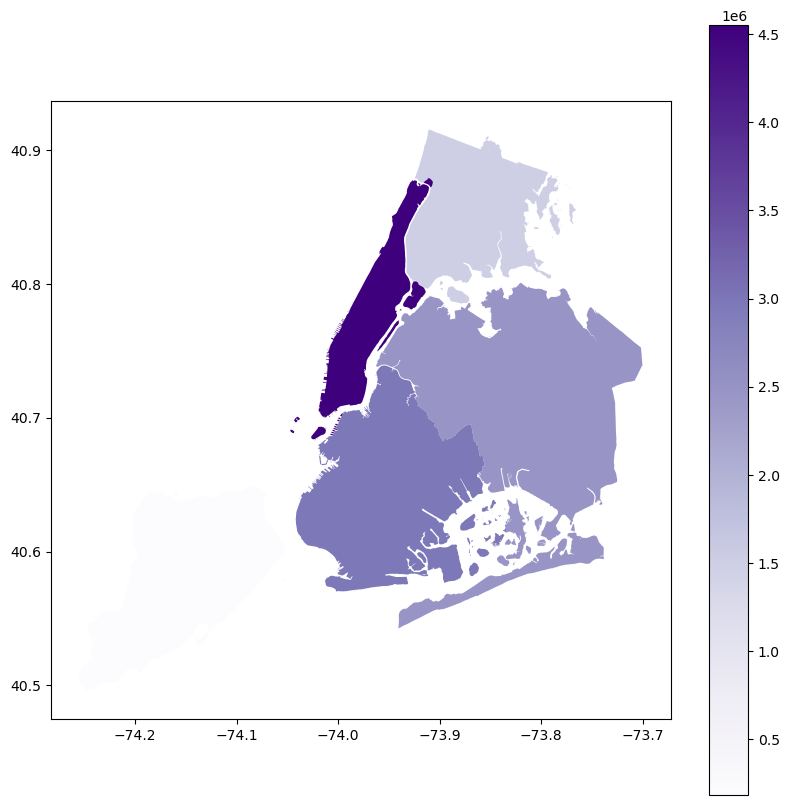

In [33]:
data.plot(figsize=(10,10),column='N',colormap = 'Purples', legend=True)